---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 4

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [8]:
P1_Graphs = pickle.load(open('A4_graphs','rb'))
P1_Graphs

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs and determine which of the three algorithms generated the graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/conda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


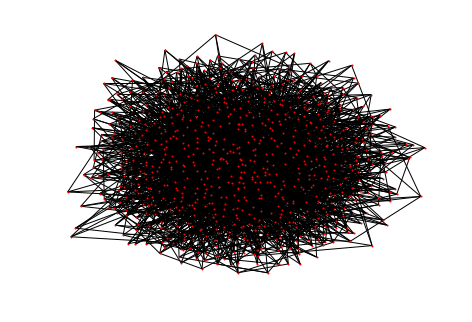

In [16]:
#import matplotlib.pyplot as plt
#nx.draw(P1_Graphs[3], node_size=1)
#plt.show()

In [25]:
def graph_identification():
    return ['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']

---

## Part 2 - Company Emails

For the second part of this assignment you will be workking with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagementSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagementSalary` indicates whether that person is receiving a management position salary.

In [17]:
G = nx.read_gpickle('email_prediction.txt')

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a management position salary.

To accomplish this, you will need to create a matrix of node features using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a management salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a management position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 252 with the data being the probability of receiving management salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

def salary_predictions():
    def is_management(node):
        managementSalary = node[1]['ManagementSalary']
        if managementSalary == 0:
            return 0
        elif managementSalary == 1:
            return 1
        else:
            return None

    df = pd.DataFrame(index=G.nodes())
    df['clustering'] = pd.Series(nx.clustering(G))
    df['degree'] = pd.Series(G.degree())
    df['degree_centrality'] = pd.Series(nx.degree_centrality(G))
    df['closeness'] = pd.Series(nx.closeness_centrality(G, normalized=True))
    df['betweeness'] = pd.Series(nx.betweenness_centrality(G, normalized=True))
    df['pr'] = pd.Series(nx.pagerank(G))
    df['is_management'] = pd.Series([is_management(node) for node in G.nodes(data=True)])
    df_train = df[~pd.isnull(df['is_management'])]
    df_test = df[pd.isnull(df['is_management'])]
    features = ['clustering', 'degree', 'degree_centrality', 'closeness', 'betweeness', 'pr']
    X_train = df_train[features]
    Y_train = df_train['is_management']
    X_test = df_test[features]
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf = MLPClassifier(hidden_layer_sizes = [15, 7], alpha = 5,
                       random_state = 0, solver='adam', verbose=0)
    clf.fit(X_train_scaled, Y_train)
    test_proba = clf.predict_proba(X_test_scaled)[:, 1]

    return pd.Series(test_proba,X_test.index)

1       0.182104
2       0.301046
5       0.541191
8       0.155963
14      0.250237
18      0.195609
27      0.210573
30      0.219554
31      0.176850
34      0.143901
37      0.152171
40      0.198210
45      0.177408
54      0.182696
55      0.173019
60      0.188413
62      0.570475
65      0.306820
77      0.134338
79      0.167493
97      0.135563
101     0.139221
103     0.186062
108     0.167314
113     0.268199
122     0.134060
141     0.262428
142     0.434416
144     0.119238
145     0.232823
          ...   
913     0.127090
914     0.129677
915     0.089056
918     0.140753
923     0.104526
926     0.119875
931     0.120957
934     0.099368
939     0.097152
944     0.089699
945     0.103535
947     0.114904
950     0.168558
951     0.110450
953     0.117323
959     0.090835
962     0.091339
963     0.164521
968     0.105823
969     0.103036
974     0.109782
984     0.097786
987     0.116392
989     0.105978
991     0.105847
992     0.095186
994     0.091095
996     0.0898

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [23]:
future_connections = pd.read_csv('Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to create a matrix of features for the edges found in `future_connections` using networkx, train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data, and predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [24]:
def new_connections_predictions():
    for node in G.nodes():
        G.node[node]['community'] = G.node[node]['Department']
        
    preferential_attachment = list(nx.preferential_attachment(G))
    df = pd.DataFrame(index=[(x[0], x[1]) for x in preferential_attachment])
    df['preferential_attachment'] = [x[2] for x in preferential_attachment]
    cn_soundarajan_hopcroft = list(nx.cn_soundarajan_hopcroft(G))
    df_cn_soundarajan_hopcroft = pd.DataFrame(index=[(x[0], x[1]) for x in cn_soundarajan_hopcroft])
    df_cn_soundarajan_hopcroft['cn_soundarajan_hopcroft'] = [x[2] for x in cn_soundarajan_hopcroft]
    df = df.join(df_cn_soundarajan_hopcroft,how='outer')
    df['cn_soundarajan_hopcroft'] = df['cn_soundarajan_hopcroft'].fillna(value=0)
    df['resource_allocation_index'] = [x[2] for x in list(nx.resource_allocation_index(G))]
    df['jaccard_coefficient'] = [x[2] for x in list(nx.jaccard_coefficient(G))]
    df = future_connections.join(df,how='outer')
    df_train = df[~pd.isnull(df['Future Connection'])]
    df_test = df[pd.isnull(df['Future Connection'])]
    features = ['cn_soundarajan_hopcroft', 'preferential_attachment', 'resource_allocation_index', 'jaccard_coefficient']
    X_train = df_train[features]
    Y_train = df_train['Future Connection']
    X_test = df_test[features]
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf = MLPClassifier(hidden_layer_sizes = [15, 7], alpha = 5,
                       random_state = 0, solver='adam', verbose=0)
    clf.fit(X_train_scaled, Y_train)
    test_proba = clf.predict_proba(X_test_scaled)[:, 1]
    predictions = pd.Series(test_proba,X_test.index)
    target = future_connections[pd.isnull(future_connections['Future Connection'])]
    target['prob'] = [predictions[x] for x in target.index]
    return target['prob']
new_connections_predictions()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(107, 348)    0.081856
(542, 751)    0.081856
(20, 426)     0.081856
(50, 989)     0.081856
(942, 986)    0.081856
(324, 857)    0.081856
(13, 710)     0.081856
(19, 271)     0.081856
(319, 878)    0.081856
(659, 707)    0.081856
(49, 843)     0.081856
(208, 893)    0.081856
(377, 469)    0.081856
(405, 999)    0.081856
(129, 740)    0.081856
(292, 618)    0.081856
(239, 689)    0.081856
(359, 373)    0.081856
(53, 523)     0.081856
(276, 984)    0.081856
(202, 997)    0.081856
(604, 619)    0.081856
(270, 911)    0.081856
(261, 481)    0.081856
(200, 450)    0.081856
(213, 634)    0.081856
(644, 735)    0.081856
(346, 553)    0.081856
(521, 738)    0.081856
(422, 953)    0.081856
                ...   
(672, 848)    0.081856
(28, 127)     0.081856
(202, 661)    0.081856
(54, 195)     0.081856
(295, 864)    0.081856
(814, 936)    0.081856
(839, 874)    0.081856
(139, 843)    0.081856
(461, 544)    0.081856
(68, 487)     0.081856
(622, 932)    0.081856
(504, 936)    0.081856
(479, 528) 